Задание 1. Алгоритм.
Реализуем свою версию Гаусса, которая не будет отнимать нулевые элементы.
Т.е. идем Гауссом по всем строкам. У текущей строки не более $min(n, i + 2)$ элементов, где и - номер строки.
И от каждой строки ниже этой отнимаем эту строку, умноженную на коэффициент, равный первый\_элемент\_нижней\_строки/первый\_элемент\_опорной\_строки (мы рассматриваем как бы подматрицу, поэтому первый элемент в строке - есть первый ненулевой элемент, т.е элемент с индексом номера опорной строки).

В результате получится матрица с главной диагональю, 1 элементом над каждым из главной диагонали, и остальные нули.
Обратным ходом гаусса занулим элементы выше диагонали, и разделим строки на элемент в них, чтобы слева получить единичную матрицу.

Для эффективности реализовал распараллеливание с помощью std::async для вычетания строк из опорной строки.

Задание 2. Просто пишем метод. Вместо хранения полных матриц Р и D можно хранить вектор: i-ый элемент - номер строки(столбца) исходной матрицы, которая(который) должна быть на i-ой позиции(0-numeration). 

Ответы для примеров:
1. $$A=\begin{bmatrix}
    -3 &      4 &      2 &     -3 &      2 &      3 &      4 &      3 & \\
    -3 &      4 &     -1 &      1 &     -4 &     -5 &     -1 &      0 & \\
    -6 &      8 &      1 &     -1 &      1 &      3 &     -3 &     -5 & \\
   -12 &     16 &      2 &     -3 &      4 &     -2 &     -3 &      4 & \\
   -24 &     32 &      4 &     -6 &      3 &     -3 &     -1 &     -2 & \\
   -48 &     64 &      8 &    -12 &      6 &     -4 &      3 &     -3 & \\
   -96 &    128 &     16 &    -24 &     12 &     -8 &     -1 &      4 & \\
     2 &     -1 &     -3 &     -4 &     -5 &      4 &      1 &     -5 & \\
\end{bmatrix}
\\
L = \begin{bmatrix}
   -96 &      0 &      0 &      0 &      0 &      0 &      0 &      0 & \\
     2 & 1.66667 &      0 &      0 &      0 &      0 &      0 &      0 & \\
    -3 &      0 &    1.5 &      0 &      0 &      0 &      0 &      0 & \\
    -6 &      0 &      0 &    0.5 &      0 &      0 &      0 &      0 & \\
   -12 &      0 &      0 &      0 &    2.5 &      0 &      0 &      0 & \\
   -24 &      0 &      0 &      0 &      0 &     -1 &      0 &      0 & \\
    -3 &      0 &   -1.5 &   -0.5 &   -2.5 &      1 &   -3.5 &      0 & \\
   -48 &      0 &      0 &      0 &      0 &      0 &    3.5 &     -7 & \\
\end{bmatrix}
\\
U = \begin{bmatrix}
     1 & -1.33333 & -0.166667 &   0.25 & -0.125 & 0.0833333 & 0.0104167 & -0.0416667 & \\
     0 &      1 &   -1.6 &   -2.7 &  -2.85 &    2.3 & 0.5875 &  -2.95 & \\
     0 &      0 &      1 &   -1.5 & 1.08333 & 2.16667 & 2.6875 & 1.91667 & \\
     0 &      0 &      0 &      1 &    0.5 &      7 & -5.875 &  -10.5 & \\
     0 &      0 &      0 &      0 &      1 &   -0.4 &  -1.15 &    1.4 & \\
     0 &      0 &      0 &      0 &      0 &      1 &   0.75 &      3 & \\
     0 &      0 &      0 &      0 &      0 &      0 &      1 & 0.571429 & \\
     0 &      0 &      0 &      0 &      0 &      0 &      0 &      1 & \\
\end{bmatrix}
\\
D = \begin{bmatrix}
         2 &          6 &          3 &          4 &          5 &          7 &          0 &          1 & \\
\end{bmatrix}
$$

2.
$$
A = \begin{bmatrix}
     1 &      1 &      1 &      1 &      1 &      1 &      1 &      1 &      1 & \\
     1 &      2 &      4 &      8 &     16 &     32 &     64 &    128 &    256 & \\
     1 &      3 &      9 &     27 &     81 &    243 &    729 &   2187 &   6561 & \\
     1 &      4 &     16 &     64 &    256 &   1024 &   4096 &  16384 &  65536 & \\
     1 &      5 &     25 &    125 &    625 &   3125 &  15625 &  78125 & 390625 & \\
     1 &      6 &     36 &    216 &   1296 &   7776 &  46656 & 279936 & 1.67962e+06 & \\
     1 &      7 &     49 &    343 &   2401 &  16807 & 117649 & 823543 & 5.7648e+06 & \\
     1 &      8 &     64 &    512 &   4096 &  32768 & 262144 & 2.09715e+06 & 1.67772e+07 & \\
     1 &      9 &     81 &    729 &   6561 &  59049 & 531441 & 4.78297e+06 & 4.30467e+07 & \\
\end{bmatrix}
\\
L = \begin{bmatrix}
     1 &      0 &      0 &      0 &      0 &      0 &      0 &      0 &      0 & \\
     1 &      8 &      0 &      0 &      0 &      0 &      0 &      0 &      0 & \\
     1 &      4 &    -16 &      0 &      0 &      0 &      0 &      0 &      0 & \\
     1 &      2 &    -12 &     24 &      0 &      0 &      0 &      0 &      0 & \\
     1 &      7 &     -7 &    -21 &   -105 &      0 &      0 &      0 &      0 & \\
     1 &      1 &     -7 &     21 &    -21 &    126 &      0 &      0 &      0 & \\
     1 &      6 &    -12 &    -24 &    -96 &     96 &    480 &      0 &      0 & \\
     1 &      5 &    -15 &    -15 &    -45 &     90 &    360 &   -360 &      0 & \\
     1 &      3 &    -15 &     15 &     15 &    -60 &   -120 &    360 &   -720 & \\
\end{bmatrix}
\\
U = \begin{bmatrix}
     1 &      1 &      1 &      1 &      1 &      1 &      1 &      1 &      1 & \\
     0 &      1 &     10 &     91 &    820 &   7381 &  66430 & 597871 & 5.38084e+06 & \\
     0 &      0 &      1 &     15 &    166 &   1650 &  15631 & 144585 & 1.3208e+06 & \\
     0 &      0 &      0 &      1 &     18 &    220 &   2310 &  22561 & 212268 & \\
     0 &      0 &      0 &      0 &      1 &     26 &    428 &   5734 &  68433 & \\
     0 &      0 &      0 &      0 &      0 &      1 &     28 &    484 &   6702 & \\
     0 &      0 &      0 &      0 &      0 &      0 &      1 &     35 &    729 & \\
     0 &      0 &      0 &      0 &      0 &      0 &      0 &      1 &     41 & \\
     0 &      0 &      0 &      0 &      0 &      0 &      0 &      0 &      1 & \\
\end{bmatrix}
\\
D = \begin{bmatrix}
     0 &      5 &      3 &      8 &      2 &      7 &      6 &      4 &      1 & \\
\end{bmatrix}
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Задание 3. Реализуем стандартные алгоритмы решения СЛАУ методами $LU$ и $LDL^T$.

Результаты записываем в файлы, потом по файлам строим график.

[11, 89, 289, 681, 1325, 2281, 3639, 5411, 7732, 10629, 14155, 18358, 23403, 31270, 49401, 43523, 52157, 62979, 72606, 84587]
[9, 76, 256, 604, 1178, 2031, 3229, 4829, 7403, 9544, 13316, 16611, 26185, 26869, 31938, 38691, 46339, 54927, 64536, 75175]
[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]


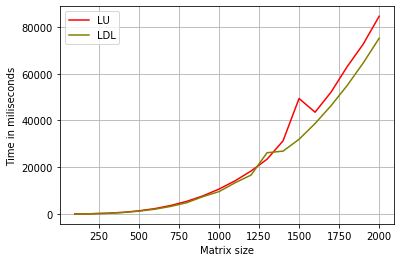

In [11]:
# Data
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21) })
 
    
with open('task3_lu_test.txt', 'r') as file_lu:
    with open('task3_ldl_test.txt', 'r') as file_ldl:
        data_lu = [int(x) for x in file_lu.readline().split()]
        data_ldl = [int(x) for x in file_ldl.readline().split()]
        
        rng = [x for x in range(100, 2001, 100)]
        print(data_lu)
        print(data_ldl)
        print(rng)
        
        # multiple line plot
        plt.plot(rng, data_lu, color='red', label='LU')
        plt.plot(rng, data_ldl, color='olive', label='LDL')
        #plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
        plt.legend()
        plt.xlabel("Matrix size")
        plt.ylabel("Time in miliseconds")
        # plt.axis((0, 100000), (0, 2000))
        axes = plt.gca()
        plt.grid(True)
        # axes.set_xlim([0,2000])
        # axes.set_ylim([0,100000])
        

Получается, что на больших матрицах метод $LDL^T$ работает быстрее. Думаю, что это связано с кешированием, т.е. т.к. матрица симметрическая, то меньше данных надо кешировать.

Задание 4. Храним трехдиагональную матрицу как вектор размера $N$x$3$. Решаем обычным методом прогонки.

Задание 5. Используем метод релаксации. Не храним лишние нули.